# We import all the necessary libraries for our classification

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# To train the data we use an inbuild MNIST dataset #

In [51]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# We flatten the images to 1D vectors of size 28*28 [784 Dimensional]

In [52]:
X_train_flattened = X_train.reshape(-1, 28*28)
X_test_flattened = X_test.reshape(-1, 28*28)

# To Normalize the pixel values to be between '0' and '1'

In [53]:
X_train_normalized = X_train_flattened / 255.0
X_test_normalized = X_test_flattened / 255.0

# We convert the labels to one-hot encoding #

In [54]:
y_train = to_categorical(y_train, 15)
y_test = to_categorical(y_test, 15)

Autoencoder Architecture:

Encoder: We will compress the image into a smaller latent represntation

In [55]:
input_img = Input(shape=(28*28,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

Decoder: We will reconstruct the image from the compressed respresentation

In [56]:
decoded = Dense(64, activation= 'relu')(encoded)
decoded = Dense(128, activation= 'relu')(decoded)
decoded = Dense(28*28, activation= 'sigmoid')(decoded)

# Combining the encoder and decoder into the autoencoder model #

In [57]:
autoencoder = Model(input_img, decoded)

# Defining the encoder model for feature extraction #

In [58]:
encoder = Model(input_img, encoded)

# Compiling the Autoencoder #

In [59]:
autoencoder.compile(optimizer = 'Adam', loss = 'mse')

# Training Autoencoder #

In [60]:
history = autoencoder.fit(X_train_normalized, X_train_normalized, epochs=15, batch_size=256, shuffle=True, validation_data=(X_test_normalized, X_test_normalized))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0953 - val_loss: 0.0373
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0336 - val_loss: 0.0258
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0253 - val_loss: 0.0226
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0223 - val_loss: 0.0201
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0199 - val_loss: 0.0183
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0182 - val_loss: 0.0168
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0168 - val_loss: 0.0158
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0159 - val_loss: 0.0149
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0151 - val_loss: 0.0143
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0145 - val_loss: 0.0137
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0140 - val_loss: 0.0133
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 

# Visualizing the loss curve during training #

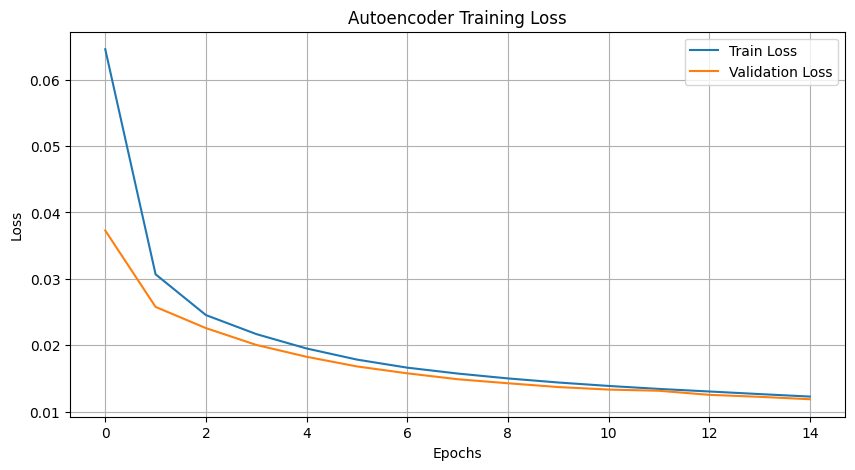

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# We use encoder to extract features form the images #

In [62]:
X_train_encoded = encoder.predict(X_train_normalized)
X_test_encoded = encoder.predict(X_test_normalized)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# We have to build MLP model for classification using the encoded fetures #

In [63]:
MLP_model = Sequential([
    Dense(128, activation='relu', input_shape=(32,)),
    Dense(64, activation='relu'),
    Dense(15, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the MLP Model #

In [64]:
MLP_model.compile(optimizer = Adam(), loss='categorical_crossentropy', metrics = ['accuracy'])

# We Train the MLP model with the encoded data #

In [65]:
MLP_history = MLP_model.fit(X_train_encoded, y_train, epochs = 15, batch_size = 256, validation_data = (X_test_encoded, y_test))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5326 - loss: 2.4016 - val_accuracy: 0.8871 - val_loss: 0.3813
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8840 - loss: 0.3807 - val_accuracy: 0.9083 - val_loss: 0.3050
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9074 - loss: 0.3055 - val_accuracy: 0.9244 - val_loss: 0.2540
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9184 - loss: 0.2685 - val_accuracy: 0.9319 - val_loss: 0.2253
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9293 - loss: 0.2372 - val_accuracy: 0.9355 - val_loss: 0.2075
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9344 - loss: 0.2112 - val_accuracy: 0.9414 - val_loss: 0.1968
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9413 - loss: 0.1926 - val_accuracy: 0.9379 - val_loss: 0.1981
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9444 - loss: 0.1843 - val_accuracy: 0.

# Evaluating the MLP model #

In [66]:
test_loss, test_accuracy = MLP_model.evaluate(X_test_encoded, y_test)
print(f'Test Accuracy of MLP: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - loss: 0.1538
Test Accuracy of MLP: 0.9592


# Plotting the accuracy of the MLP during training #

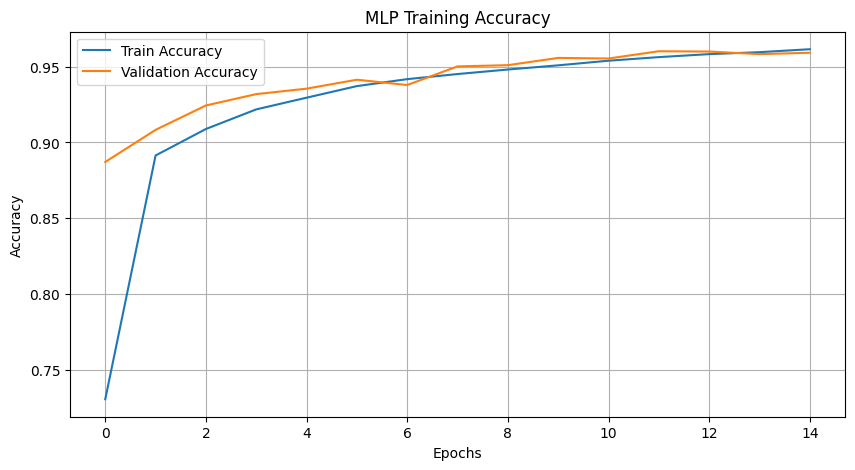

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(MLP_history.history['accuracy'], label='Train Accuracy')
plt.plot(MLP_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MLP Training Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing some of the reconstructed images #

# We predict first to test samples #

# Displaying original images #

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


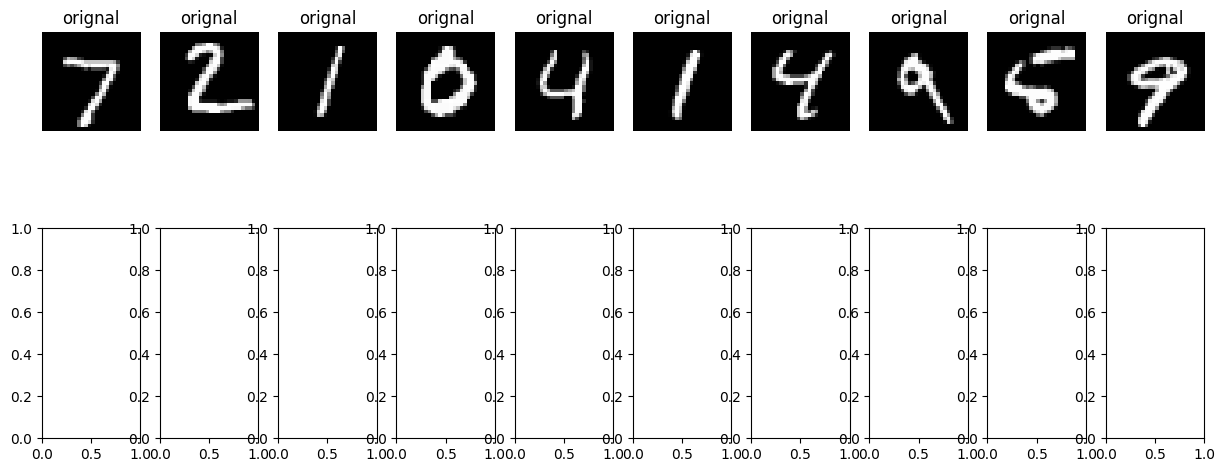

In [68]:
decoded_images = autoencoder.predict(X_test_normalized[:10])
decoded_images = autoencoder.predict(X_test_normalized[:10])
Fig, axes = plt.subplots(2, 10, figsize=(15, 6))
for i in range(10):
  axes[0,i].imshow(X_test[i].reshape((28,28)), cmap = 'gray')
  axes[0,i].set_title("orignal")
  axes[0,i].axis('off')


# Displaying reconstructed images #

In [69]:
axes[1,i].imshow(decoded_images[i].reshape(28,28), cmap = 'gray')
axes[1,i].set_title("reconstructed")
axes[1,i].axis('off')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

# prediction first 10 images using the trained MLP #

In [70]:
prediction = MLP_model.predict(X_test_encoded[:10])
print("predicted labels:", np.argmax(prediction, axis=1))
print("actual labels:", np.argmax(y_test[:10], axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
predicted labels: [7 2 1 0 4 1 4 9 6 9]
actual labels: [7 2 1 0 4 1 4 9 5 9]
